In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159510,2021-12-08,Pfizer/BioNTech,VDA,50-59,3,3,1,0,0,5,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159511,2021-12-08,Pfizer/BioNTech,VDA,60-69,3,3,0,1,0,5,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159512,2021-12-08,Pfizer/BioNTech,VDA,70-79,4,6,0,0,0,10,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159513,2021-12-08,Pfizer/BioNTech,VDA,80-89,0,1,0,0,0,1,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste


In [ ]:
dfn1 = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
dfn1

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


il primo deve visualizzare, per ogni regione, il numero di vaccinati (prima dose) e il numero totale di abitanti di quella regione

In [ ]:
df1 = df.groupby('area',as_index=False).sum()[['area','prima_dose',]]


In [ ]:
dfn2 = dfn1.groupby('nome_area',as_index=False).sum()[['nome_area','totale_popolazione']]

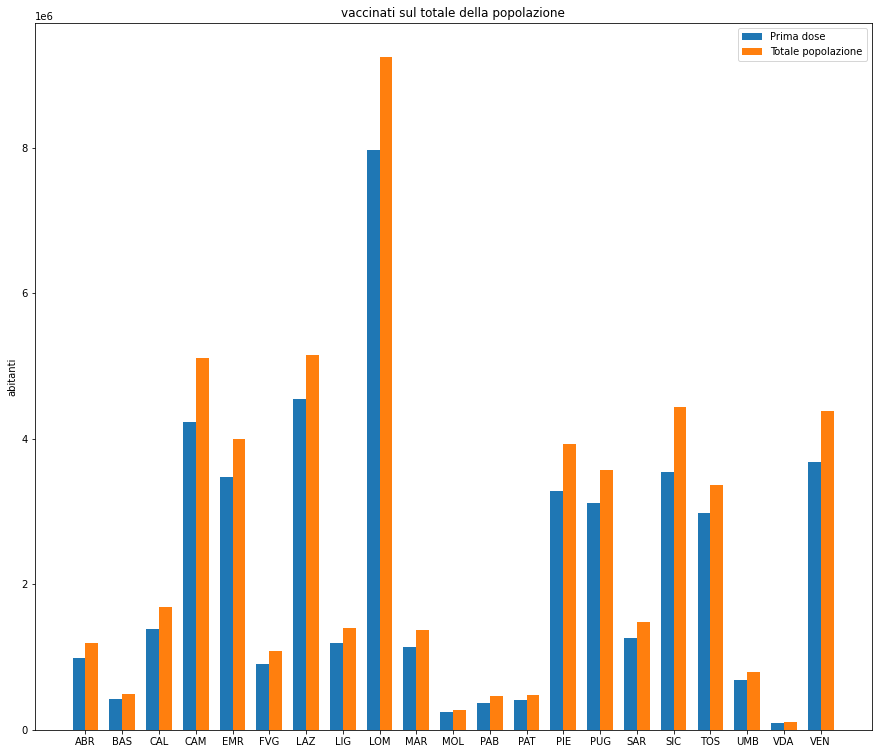

In [ ]:
import numpy as np

fig = plt.figure(figsize=(15,13))
ax = plt.axes()

x = np.arange(len(df1['area'])) 

ax.bar(x - width / 2,df1['prima_dose'],width,label="Prima dose")
ax.bar(x + width / 2,dfn2['totale_popolazione'],width,label="Totale popolazione")

ax.set_xticks(x)
ax.set_xticklabels(df1['area'])
ax.legend()
plt.title('vaccinati sul totale della popolazione')
ax.set_ylabel('abitanti')
plt.savefig

plt.show()

il secondo deve contenere le percentuali di vaccinazioni (prima dose) sul totale dei vaccinati. 


In [ ]:
df1['percentuale'] = df1['prima_dose']/dfn2['totale_popolazione']*100


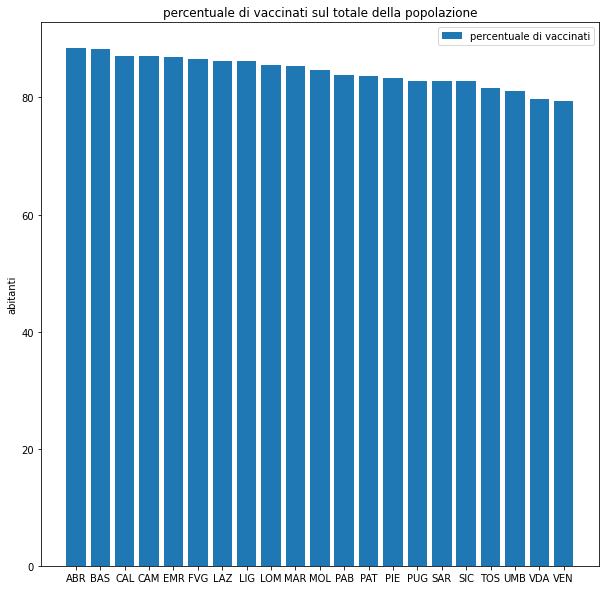

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.bar(df1['area'],df1['percentuale'].sort_values(ascending=False),label='percentuale di vaccinati')
ax.legend()
ax.set_ylabel('abitanti')

plt.title('percentuale di vaccinati sul totale della popolazione')
plt.savefig
plt.show()